<a href="https://colab.research.google.com/github/angelolmg/aprendizagem-maquina/blob/main/2_M%C3%A9todos_probabil%C3%ADsticos_de_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem de máquina e mineração de dados (07/03/24)
### Angelo Leite - angelo.leite.056@ufrn.edu.br  
### Teorema de Bayes, distribuições gaussianas e classificadores Naive Bayes


## 1. Teorema de Bayes

Baseado na aula de [Josh Starmer](https://www.youtube.com/watch?v=9wCnvr7Xw4E)  
Playlist [Statistics Fundamentals](https://www.youtube.com/playlist?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY)

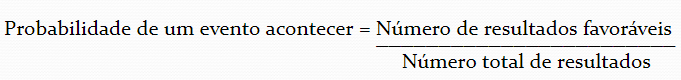

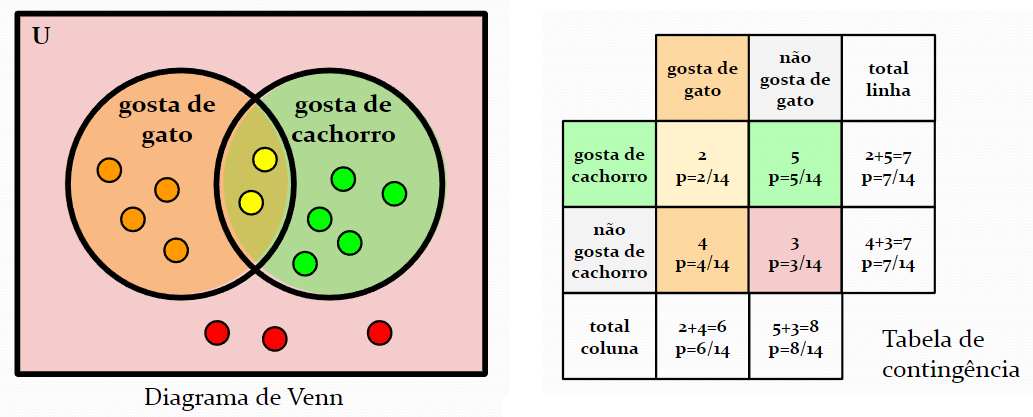

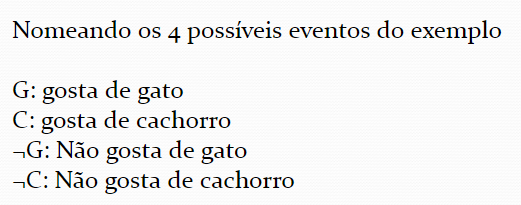

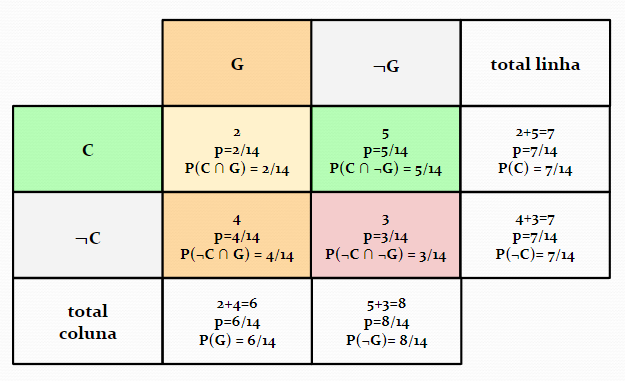

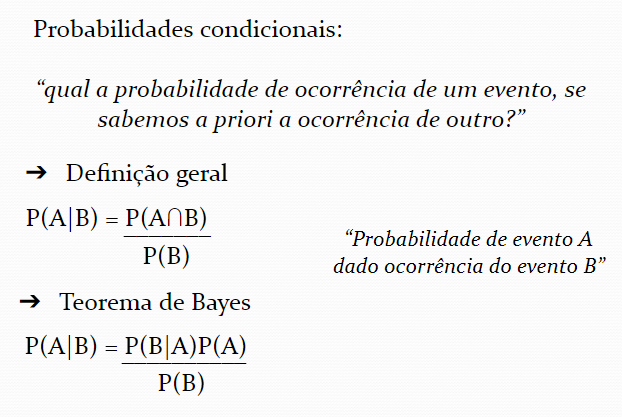

### $→$ Lei da probabilidade total

$P(A) = \sum_{i=1}^{n} P(A | B_i) \times P(B_i)$


### **1.1 Exemplos**

a) **Calcule** $P(C|¬G)$

$P(C|¬G) →$ "qual a probabilidade de alguém gostar de cachorro dado que sabemos que ela não gosta de gato?"

Sabemos que:

P(C ∩ ¬G) = 5/14
P(¬G) = 8/14

Pela definição geral temos:

$P(C|¬G) = \frac{P(C ∩ ¬G)}{P(¬G)} = \frac{5/14}{8/14} = 5/8$

<br>

---

b) *Fonte: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/bs704_probability6.html*

**Um paciente vai ao médico. O médico realiza um teste com 99 por cento de confiabilidade - isto é, 99 por cento das pessoas doentes testam positivo e 99 por cento das pessoas saudáveis testam negativo. O médico sabe que apenas 1 por cento das pessoas no país estão doentes.**

**Agora a questão é: se o paciente testar positivo, quais são as chances de o paciente estar doente?**




Definindo as probabilidades:
- $ P(D) $: Probabilidade de uma pessoa estar doente. (Dada como 0,01 ou 1%)
- $ P(S) $: Probabilidade de uma pessoa estar saudável. (Dada como 1 - 0,01 = 0,99 ou 99%)
- $ P(Pos|D) $: Probabilidade de uma pessoa doente testar positivo. (Dada como 0,99 ou 99%)
- $ P(Neg|S) $: Probabilidade de uma pessoa saudável testar negativo. (Dada como 0,99 ou 99%)

<br>

Nos é perguntado para encontrar $ P(D|Pos) $, a probabilidade de uma pessoa estar doente dado que ela testou positivo.

Usando o teorema de Bayes, temos:

$ P(D|Pos) = \frac{P(Pos|D) \times P(D)}{P(Pos)} $

<br>

Precisamos encontrar $ P(Pos) $, a probabilidade de testar positivo, que pode ser calculada usando a lei da probabilidade total:

$ P(Pos) = P(Pos|D) \times P(D) + P(Pos|S) \times P(S) $

Dado que $ P(Pos|S) $, a probabilidade de uma pessoa saudável testar positivo, é $ 1 - P(Neg|S) = 1 - 0,99 = 0,01 $ (pois o complemento de testar negativo é testar positivo).

<br>


Substituindo os valores:

$ P(Pos) = (0,99 \times 0,01) + (0,01 \times 0,99) = 0,0099 + 0,0099 = 0,0198 $

<br>


Calculando $ P(D|Pos) $:

$ P(D|Pos) = \frac{0,99 \times 0,01}{0,0198} \approx \frac{0,0099}{0,0198} \approx 0,5 $

<br>


Portanto, se o paciente testar positivo, as chances de o paciente estar doente são aproximadamente 50%.

## 2. Distribuições Gaussianas

Pritha Bhandari (2023): [Normal Distribution | Examples, Formulas, & Uses](https://www.scribbr.com/statistics/normal-distribution/)  
Josh Starmer (2020): [Calculating the Mean, Variance and Standard Deviation, Clearly Explained!!!](https://www.youtube.com/watch?v=SzZ6GpcfoQY)  
HashPi: [Visualizing a multivariate Gaussian](https://www.hashpi.com/visualizing-a-multivariate-gaussian)


### 2.1 Distribuição Unidimensional

Média da altura (100 amostras): 173.16 cm
Desvio Padrão da altura (100 amostras): 7.32 cm
Média da altura (1000 amostras): 173.33 cm
Desvio Padrão da altura (1000 amostras): 7.36 cm


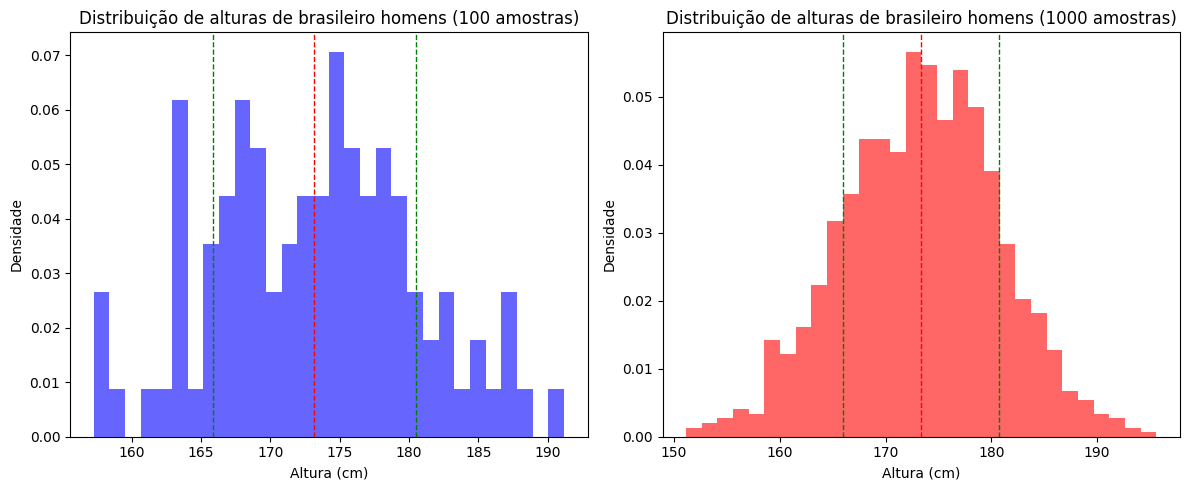

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros da distribuição normal para altura de brasileiros
media_altura = 173.1  # Média da altura em cm
desvio_padrao_altura = 7.3  # Desvio padrão da altura em cm

# Gerando dados aleatórios seguindo a distribuição normal de alturas de brasileiros
alturas_100 = np.random.normal(media_altura, desvio_padrao_altura, 100)
alturas_1000 = np.random.normal(media_altura, desvio_padrao_altura, 1000)

# Criando a figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Criando o histograma com 100 amostras
axs[0].hist(alturas_100, bins=30, density=True, alpha=0.6, color='b')
axs[0].axvline(np.mean(alturas_100), color='r', linestyle='dashed', linewidth=1)
axs[0].axvline(np.mean(alturas_100) + np.std(alturas_100), color='g', linestyle='dashed', linewidth=1)
axs[0].axvline(np.mean(alturas_100) - np.std(alturas_100), color='g', linestyle='dashed', linewidth=1)
axs[0].set_title('Distribuição de alturas de brasileiro homens (100 amostras)')
axs[0].set_xlabel('Altura (cm)')
axs[0].set_ylabel('Densidade')

# Criando o histograma com 1000 amostras
axs[1].hist(alturas_1000, bins=30, density=True, alpha=0.6, color='r')
axs[1].axvline(np.mean(alturas_1000), color='r', linestyle='dashed', linewidth=1)
axs[1].axvline(np.mean(alturas_1000) + np.std(alturas_1000), color='g', linestyle='dashed', linewidth=1)
axs[1].axvline(np.mean(alturas_1000) - np.std(alturas_1000), color='g', linestyle='dashed', linewidth=1)
axs[1].set_title('Distribuição de alturas de brasileiro homens (1000 amostras)')
axs[1].set_xlabel('Altura (cm)')
axs[1].set_ylabel('Densidade')

# Exibindo a média e o desvio padrão das alturas calculados
print(f'Média da altura (100 amostras): {np.mean(alturas_100):.2f} cm')
print(f'Desvio Padrão da altura (100 amostras): {np.std(alturas_100):.2f} cm')

print(f'Média da altura (1000 amostras): {np.mean(alturas_1000):.2f} cm')
print(f'Desvio Padrão da altura (1000 amostras): {np.std(alturas_1000):.2f} cm')

# Ajustando o layout
plt.tight_layout()

# Mostrando a figura
plt.show()


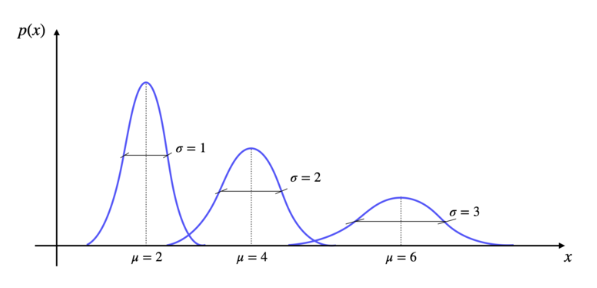

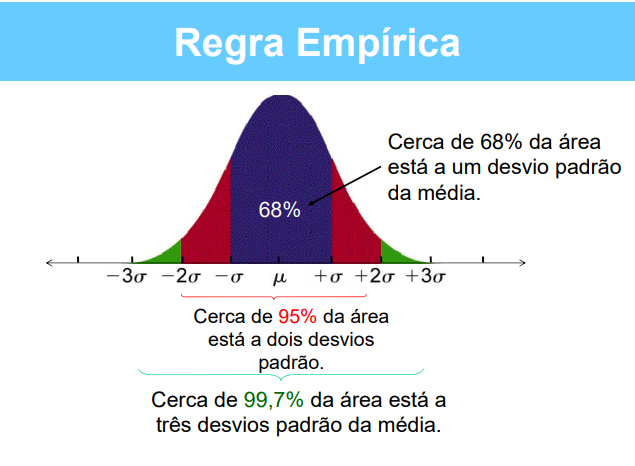

[Fonte](http://www.de.ufpb.br/~tatiene/Disciplinas/2014.2/Slides/cap05LarsonFarber.pdf)

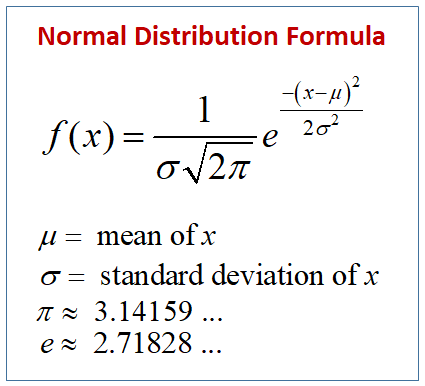

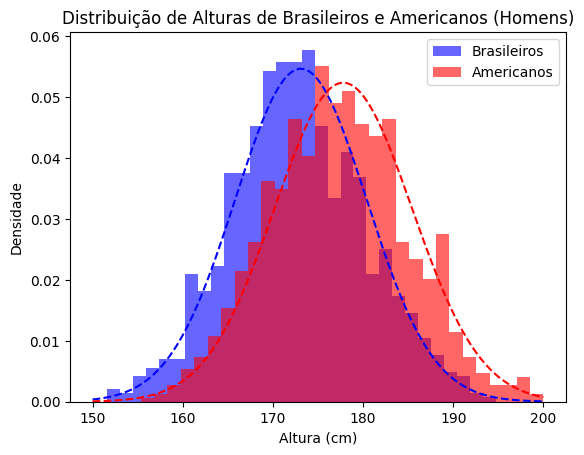

Média da altura dos brasileiros: 172.78 cm
Desvio Padrão da altura dos brasileiros: 7.41 cm
Média da altura dos americanos: 177.25 cm
Desvio Padrão da altura dos americanos: 7.68 cm


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros da distribuição normal para altura de brasileiros
media_altura_brasileiros = 173.1  # Média da altura em cm
desvio_padrao_altura_brasileiros = 7.3  # Desvio padrão da altura em cm
num_amostras = 1000  # Número de amostras (brasileiros)

# Gerando dados aleatórios seguindo a distribuição normal de alturas de brasileiros
alturas_brasileiros = np.random.normal(media_altura_brasileiros, desvio_padrao_altura_brasileiros, num_amostras)

# Definindo os parâmetros da distribuição normal para altura de americanos
media_altura_americanos = 177.8  # Média da altura em cm
desvio_padrao_altura_americanos = 7.62  # Desvio padrão da altura em cm

# Gerando dados aleatórios seguindo a distribuição normal de alturas de americanos
alturas_americanos = np.random.normal(media_altura_americanos, desvio_padrao_altura_americanos, num_amostras)

# Criando o histograma para brasileiros
plt.hist(alturas_brasileiros, bins=30, density=True, alpha=0.6, color='b', label='Brasileiros')

# Criando o histograma para americanos
plt.hist(alturas_americanos, bins=30, density=True, alpha=0.6, color='r', label='Americanos')

# Criando curvas gaussianas para as distribuições de brasileiros e americanos
x = np.linspace(150, 200, 1000)

# Calculando as curvas gaussianas
pdf_brasileiros = (1/(desvio_padrao_altura_brasileiros * np.sqrt(2 * np.pi))) * np.exp(-((x - media_altura_brasileiros) ** 2) / (2 * desvio_padrao_altura_brasileiros ** 2))
pdf_americanos = (1/(desvio_padrao_altura_americanos * np.sqrt(2 * np.pi))) * np.exp(-((x - media_altura_americanos) ** 2) / (2 * desvio_padrao_altura_americanos ** 2))

# Plotando as curvas gaussianas
plt.plot(x, pdf_brasileiros, color='b', linestyle='--')
plt.plot(x, pdf_americanos, color='r', linestyle='--')

# Adicionando legendas
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade')
plt.title('Distribuição de Alturas de Brasileiros e Americanos (Homens)')
plt.legend(loc="upper right")

# Mostrando a figura
plt.show()

# Exibindo a média e o desvio padrão das alturas dos brasileiros
print(f'Média da altura dos brasileiros: {np.mean(alturas_brasileiros):.2f} cm')
print(f'Desvio Padrão da altura dos brasileiros: {np.std(alturas_brasileiros):.2f} cm')

# Exibindo a média e o desvio padrão das alturas dos americanos
print(f'Média da altura dos americanos: {np.mean(alturas_americanos):.2f} cm')
print(f'Desvio Padrão da altura dos americanos: {np.std(alturas_americanos):.2f} cm')


Se considerarmos um homem com uma altura $x$, como podemos classificar essa pessoa entre brasileiro ou americano?

- Se $P(Americano|x)$ > $P(Brasileiro|x)$, então classifique como **americano**
- Se $P(Brasileiro|x)$ > $P(Americano|x)$, então classifique como **brasileiro**

In [61]:
import numpy as np

def calcular_probabilidade_altura(x, media_brasileiros, desvio_brasileiros, media_americanos, desvio_americanos):
    # Calculando as PDFs para as distribuições brasileiras e americanas
    pdf_brasileiros = (1/(desvio_brasileiros * np.sqrt(2 * np.pi))) * np.exp(-((x - media_brasileiros) ** 2) / (2 * desvio_brasileiros ** 2))
    pdf_americanos = (1/(desvio_americanos * np.sqrt(2 * np.pi))) * np.exp(-((x - media_americanos) ** 2) / (2 * desvio_americanos ** 2))

    # Retornando as probabilidades relativas de ser brasileiro ou americano
    return pdf_brasileiros, pdf_americanos

# Exemplo de uso
altura = 185  # Altura a ser avaliada
media_altura_brasileiros = 173.1
desvio_padrao_altura_brasileiros = 7.3
media_altura_americanos = 177.8
desvio_padrao_altura_americanos = 7.62

prob_brasileiros, prob_americanos = calcular_probabilidade_altura(altura, media_altura_brasileiros, desvio_padrao_altura_brasileiros, media_altura_americanos, desvio_padrao_altura_americanos)

print(f'Probabilidade de ser brasileiro: {prob_brasileiros}')
print(f'Probabilidade de ser americano: {prob_americanos}')


Probabilidade de ser brasileiro: 0.01447277213763409
Probabilidade de ser americano: 0.03350315063709214


Tendo como entrada 185cm, pela distribuição normal há uma chance de ~1.4% de ser brasileiro e ~3.3% de ser americano. Nesses termos, classificariamos como **americano**.

### 2.2 Distribuição Multidimensional

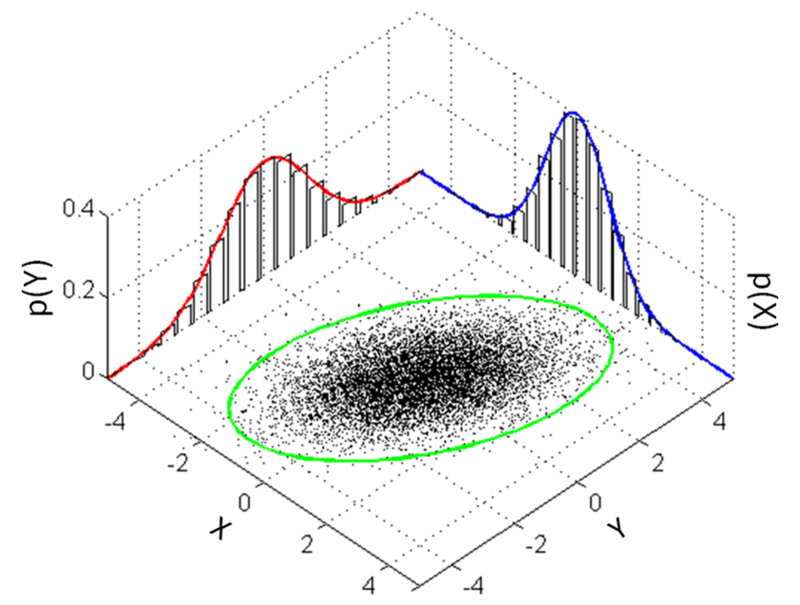

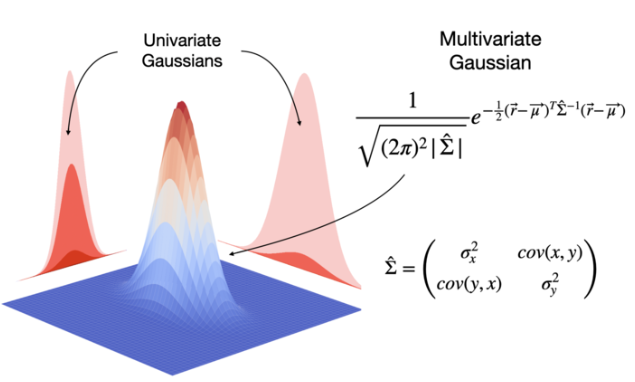

"A covariância mede a **direção do relacionamento entre duas variáveis**. Uma covariância positiva significa que ambas as variáveis tendem a ser altas ou baixas ao mesmo tempo. Uma covariância negativa significa que quando uma variável é alta, a outra tende a ser baixa."

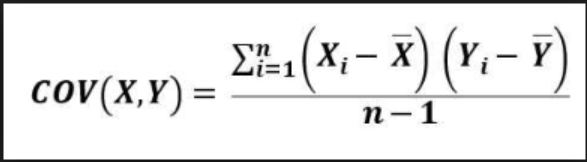

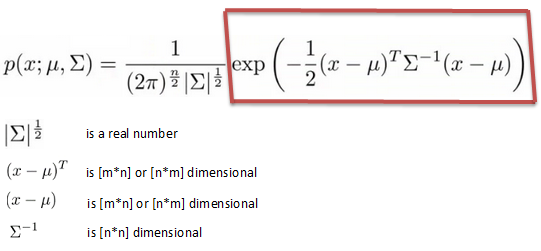

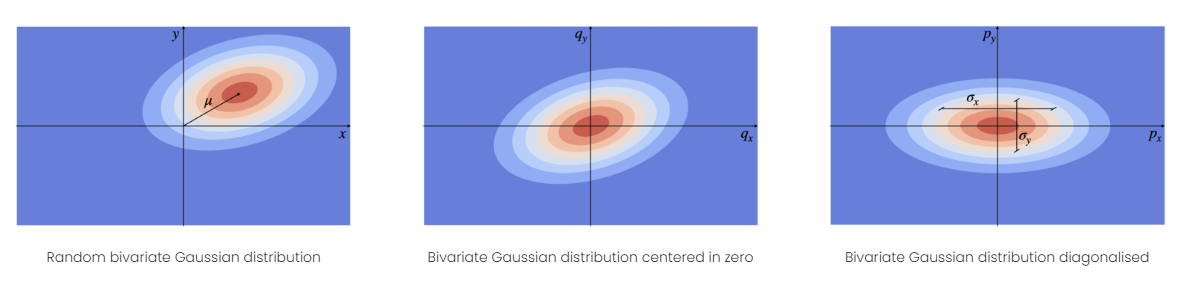

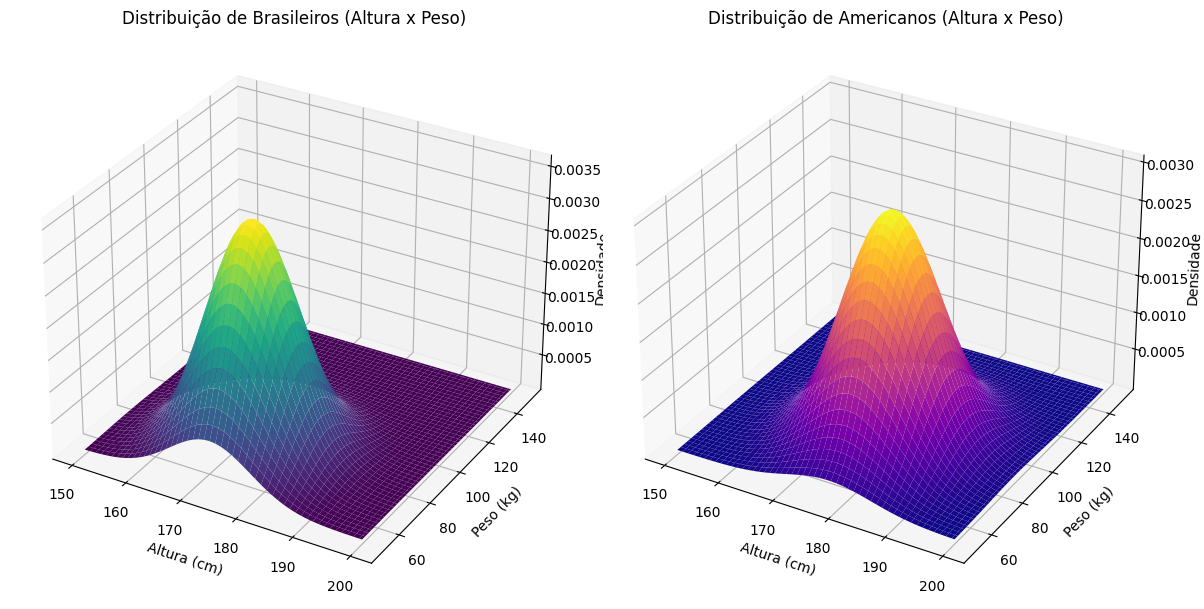

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo os parâmetros da distribuição normal para brasileiros (altura e peso)
media_brasileiros = np.array([173.1, 76.5])  # Média da altura e peso dos brasileiros
covariance_brasileiros = np.array([[7.3**2, 0], [0, 15.2**2]])  # Matriz de covariância dos brasileiros

# Definindo os parâmetros da distribuição normal para americanos (altura e peso)
media_americanos = np.array([177.8, 88.7])  # Média da altura e peso dos americanos
covariance_americanos = np.array([[7.62**2, 0], [0, 17.3**2]])  # Matriz de covariância dos americanos

# Criando grid de valores para altura e peso
altura = np.linspace(150, 200, 100)
peso = np.linspace(50, 150, 100)
altura, peso = np.meshgrid(altura, peso)

# Criando um grid 2D de pontos (altura, peso)
points = np.vstack([altura.ravel(), peso.ravel()]).T

# Calculando a distribuição de probabilidade conjunta para brasileiros
Z_brasileiros = np.exp(-0.5 * np.sum((points - media_brasileiros) @ np.linalg.inv(covariance_brasileiros) * (points - media_brasileiros), axis=1))
Z_brasileiros /= np.sqrt(2 * np.pi * np.linalg.det(covariance_brasileiros))
Z_brasileiros = Z_brasileiros.reshape(altura.shape)

# Calculando a distribuição de probabilidade conjunta para americanos
Z_americanos = np.exp(-0.5 * np.sum((points - media_americanos) @ np.linalg.inv(covariance_americanos) * (points - media_americanos), axis=1))
Z_americanos /= np.sqrt(2 * np.pi * np.linalg.det(covariance_americanos))
Z_americanos = Z_americanos.reshape(altura.shape)

# Plotando a superfície da distribuição gaussiana bidimensional para brasileiros
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(altura, peso, Z_brasileiros, cmap='viridis')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Peso (kg)')
ax.set_zlabel('Densidade')
ax.set_title('Distribuição de Brasileiros (Altura x Peso)')

# Plotando a superfície da distribuição gaussiana bidimensional para americanos
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(altura, peso, Z_americanos, cmap='plasma')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Peso (kg)')
ax.set_zlabel('Densidade')
ax.set_title('Distribuição de Americanos (Altura x Peso)')

plt.tight_layout()
plt.show()


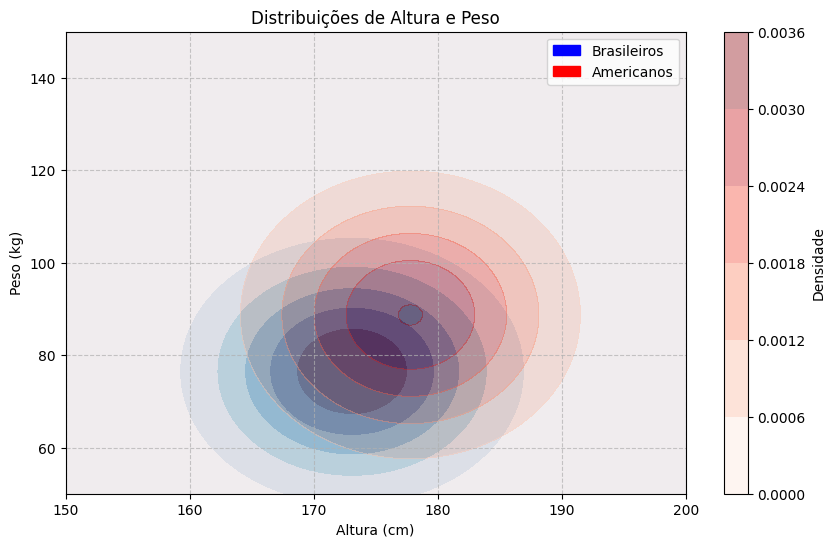

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definindo os parâmetros da distribuição normal para brasileiros (altura e peso)
media_brasileiros = np.array([173.1, 76.5])  # Média da altura e peso dos brasileiros
covariance_brasileiros = np.array([[7.3**2, 0], [0, 15.2**2]])  # Matriz de covariância dos brasileiros

# Definindo os parâmetros da distribuição normal para americanos (altura e peso)
media_americanos = np.array([177.8, 88.7])  # Média da altura e peso dos americanos
covariance_americanos = np.array([[7.62**2, 0], [0, 17.3**2]])  # Matriz de covariância dos americanos

# Criando grid de valores para altura e peso
altura = np.linspace(150, 200, 100)
peso = np.linspace(50, 150, 100)
altura, peso = np.meshgrid(altura, peso)

# Criando um grid 2D de pontos (altura, peso)
points = np.vstack([altura.ravel(), peso.ravel()]).T

# Calculando a distribuição de probabilidade conjunta para brasileiros
Z_brasileiros = np.exp(-0.5 * np.sum((points - media_brasileiros) @ np.linalg.inv(covariance_brasileiros) * (points - media_brasileiros), axis=1))
Z_brasileiros /= np.sqrt(2 * np.pi * np.linalg.det(covariance_brasileiros))
Z_brasileiros = Z_brasileiros.reshape(altura.shape)

# Calculando a distribuição de probabilidade conjunta para americanos
Z_americanos = np.exp(-0.5 * np.sum((points - media_americanos) @ np.linalg.inv(covariance_americanos) * (points - media_americanos), axis=1))
Z_americanos /= np.sqrt(2 * np.pi * np.linalg.det(covariance_americanos))
Z_americanos = Z_americanos.reshape(altura.shape)

# Plotando a superfície da distribuição gaussiana bidimensional
plt.figure(figsize=(10, 6))
plt.contourf(altura, peso, Z_brasileiros, levels=5, cmap='Blues', alpha=1)
plt.contourf(altura, peso, Z_americanos, levels=5, cmap='Reds', alpha=0.4)
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Distribuições de Altura e Peso')

# Criando objetos de legenda manualmente
brasileiros_patch = mpatches.Patch(color='blue', label='Brasileiros')
americanos_patch = mpatches.Patch(color='red', label='Americanos')
plt.legend(handles=[brasileiros_patch, americanos_patch], loc='upper right', facecolor='white')

plt.colorbar(label='Densidade')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [65]:
import numpy as np

def calcular_probabilidade_altura_peso_covariancia(altura, peso, media_brasileiros, covariancia_brasileiros, media_americanos, covariancia_americanos):
    # Calculando a inversa da matriz de covariância
    inv_covariancia_brasileiros = np.linalg.inv(covariancia_brasileiros)
    inv_covariancia_americanos = np.linalg.inv(covariancia_americanos)

    # Calculando a diferença entre as variáveis e as médias
    diff_brasileiros = np.array([altura - media_brasileiros[0], peso - media_brasileiros[1]])
    diff_americanos = np.array([altura - media_americanos[0], peso - media_americanos[1]])

    # Calculando o expoente da função exponencial
    expoente_brasileiros = np.sum(diff_brasileiros.T.dot(inv_covariancia_brasileiros) * diff_brasileiros, axis=0)
    expoente_americanos = np.sum(diff_americanos.T.dot(inv_covariancia_americanos) * diff_americanos, axis=0)

    # Calculando a PDF para brasileiros e americanos
    pdf_brasileiros = np.exp(-0.5 * expoente_brasileiros) / (2 * np.pi * np.sqrt(np.linalg.det(covariancia_brasileiros)))
    pdf_americanos = np.exp(-0.5 * expoente_americanos) / (2 * np.pi * np.sqrt(np.linalg.det(covariancia_americanos)))

    return pdf_brasileiros, pdf_americanos

# Exemplo de uso
altura = 185  # Altura a ser avaliada
peso = 90  # Peso a ser avaliado

media_altura_brasileiros = np.array([173.1, 76.5])
covariancia_brasileiros = np.array([[7.3**2, 0], [0, 15.2**2]])

media_altura_americanos = np.array([177.8, 88.7])
covariancia_americanos = np.array([[7.62**2, 0], [0, 17.3**2]])

prob_brasileiros, prob_americanos = calcular_probabilidade_altura_peso_covariancia(altura, peso,
                                                                                    media_altura_brasileiros, covariancia_brasileiros,
                                                                                    media_altura_americanos, covariancia_americanos)

print(f'Probabilidade de ser brasileiro: {prob_brasileiros}')
print(f'Probabilidade de ser americano: {prob_americanos}')


Probabilidade de ser brasileiro: 0.00025605139742082014
Probabilidade de ser americano: 0.000770412725938457


Tendo como entrada 185cm e 90kg, pela distribuição normal multivariada fornecida há uma chance de ~0.02% de ser brasileiro e ~0.07% de ser americano. Nesses termos, classificariamos como **americano**.

Outra maneira seria somente calcular a distância entre as médias da entrada, classificando pela média mais próxima:

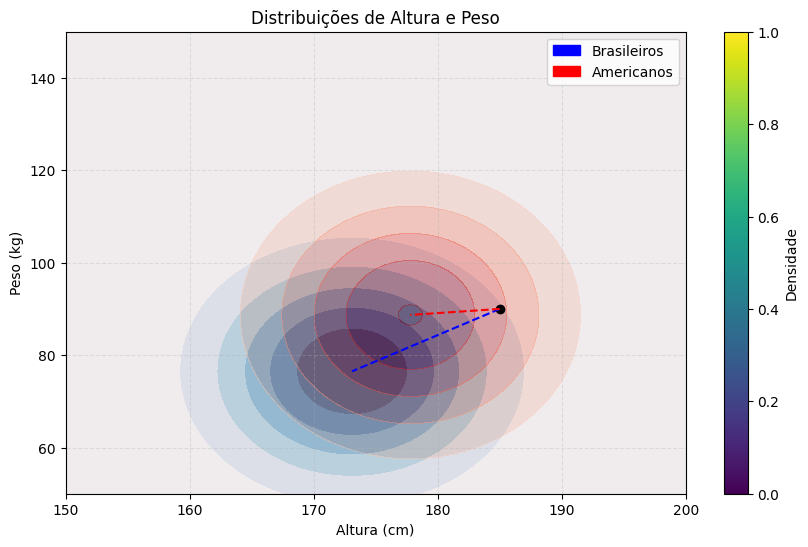

Distância do ponto (185, 90) até a média dos brasileiros (173.1, 76.5): 18.00
Distância do ponto (185, 90) até a média dos americanos (177.8, 88.7): 7.32


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definindo as coordenadas dos pontos
altura_ponto = 185
peso_ponto = 90

# Definindo as médias
media_brasileiros = np.array([173.1, 76.5])
media_americanos = np.array([177.8, 88.7])

# Calculando as distâncias euclidianas
distancia_brasileiros = np.sqrt(np.sum((np.array([altura_ponto, peso_ponto]) - media_brasileiros)**2))
distancia_americanos = np.sqrt(np.sum((np.array([altura_ponto, peso_ponto]) - media_americanos)**2))

# Plotando a superfície da distribuição gaussiana bidimensional
plt.figure(figsize=(10, 6))
plt.contourf(altura, peso, Z_brasileiros, levels=5, cmap='Blues', alpha=1)
plt.contourf(altura, peso, Z_americanos, levels=5, cmap='Reds', alpha=0.4)

# Adicionando o ponto
plt.scatter(altura_ponto, peso_ponto, color='black', marker='o')

# Adicionando as linhas pontilhadas
plt.plot([altura_ponto, media_brasileiros[0]], [peso_ponto, media_brasileiros[1]], '--', color='blue')
plt.plot([altura_ponto, media_americanos[0]], [peso_ponto, media_americanos[1]], '--', color='red')

plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Distribuições de Altura e Peso')

# Criando objetos de legenda manualmente
brasileiros_patch = mpatches.Patch(color='blue', label='Brasileiros')
americanos_patch = mpatches.Patch(color='red', label='Americanos')
plt.legend(handles=[brasileiros_patch, americanos_patch], loc='upper right', facecolor='white')

plt.colorbar(label='Densidade')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Imprimindo as distâncias
print(f'Distância do ponto (185, 90) até a média dos brasileiros (173.1, 76.5): {distancia_brasileiros:.2f}')
print(f'Distância do ponto (185, 90) até a média dos americanos (177.8, 88.7): {distancia_americanos:.2f}')


Como a distância entre o ponto e a média americana é menor, classificariamos como **americano**.

Além de distância euclidiana, existem outros tipos de distância, como a distância de Mahalanobis, que leva em consideração a covariância entre variáveis. A escolha de uma distância pela outra vai depender do problema.

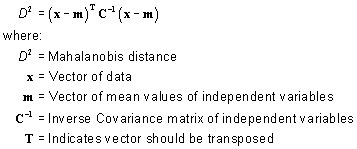

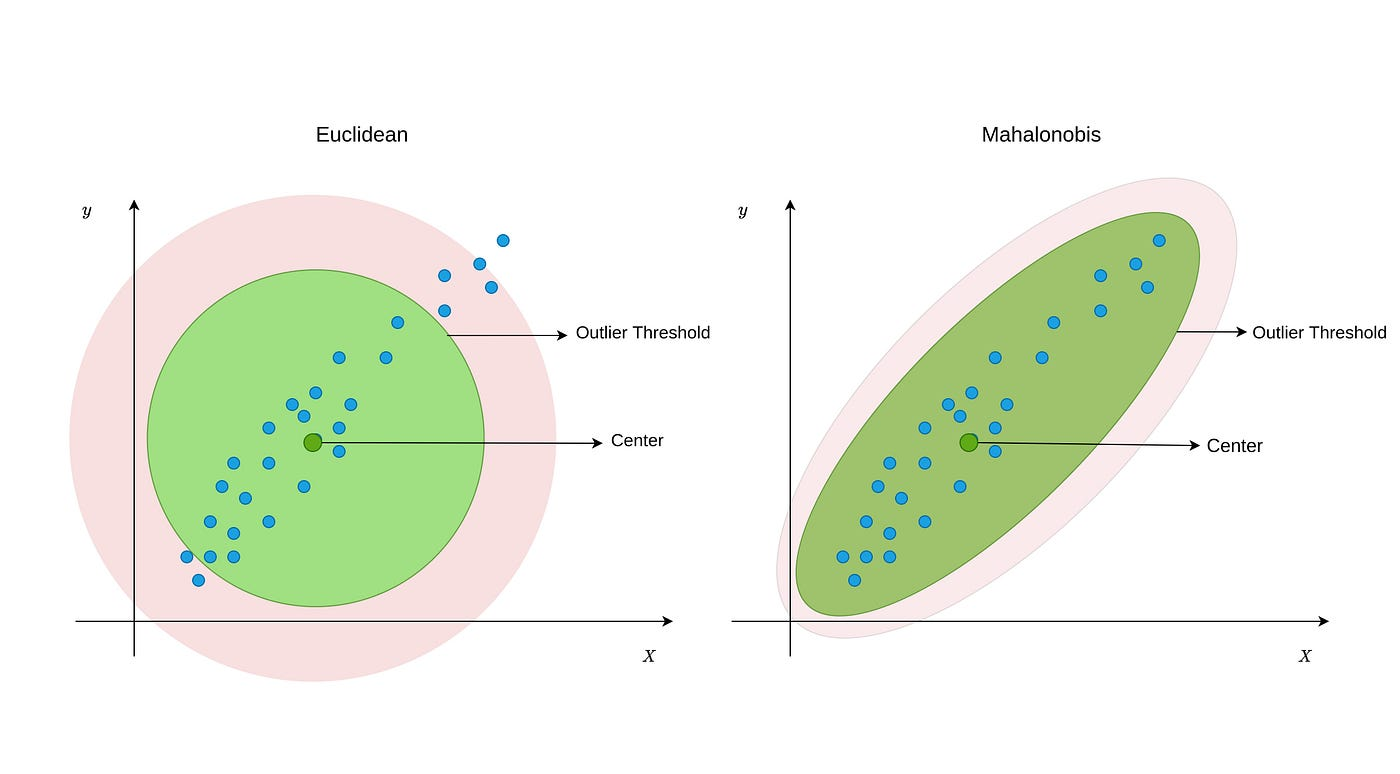

## 3. Naive Bayes

* Naive Bayes é um algoritmo de classificação probabilistica baseado no teorema de Bayes

* Ele é "ingênuo" pois assume que as evidências são todas **independentes**

* Ainda assim, empiricamente, é uma técnica robusta para diversas aplicações:   
 * detecção de spam
 * diagnosticos médicos
 * avaliação de crédito
 * detecção de faces, etc

**Fórmula geral:**

$P(H|E) = \frac{P( E_1 |H )P( E_2 | H) ... P(E_n | H)P(H)}{P(E_1).P(E_2)...P(E_n)}$

Sendo $H$ a hipótese e $E$ a evidência

### **3.1 Exemplos:**

a) Dada a tabela de decisão seguinte, responda:

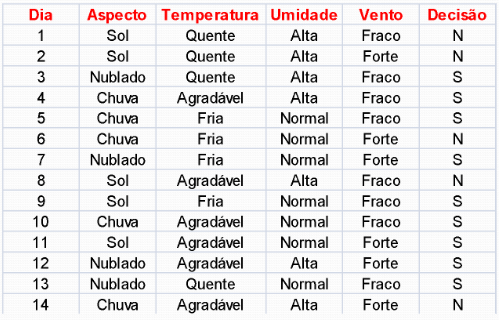

Qual será a decisão (valor da classe/hipótese), se o dia estiver com **sol**, a temperatura **fria**, a umidade **alta** e o vento **forte**?

Isto é, qual a hipótese mais provável:

$P(S | Sol, Fria, Alta, Forte)?$

$P(N | Sol, Fria, Alta, Forte)?$

<br>

Pela fórmula:

$P(S | Sol, Fria, Alta, Forte) = \frac{P( Sol|S) * P( Fria|S) * P(Alta|S) * P(Forte|S) * P(S)}{P( Sol) * P( Fria) * P(Alta)* P(Forte)}$

$P(N | Sol, Fria, Alta, Forte) = \frac{P( Sol|N) * P( Fria|N) * P(Alta|N) * P(Forte|N) * P(N)}{P( Sol) * P( Fria) * P(Alta)* P(Forte)}$

<br>

Pela tabela:

$P(S) = 9/14$  
$P(N) = 5/14$  
$P(Sol | S) = 2/9$  
$P(Sol | N) = 3/5$  
$P(Fria | S) = 3/9$  
$P(Fria | N) = 1/5$  
$P(Alta | S) = 3/9$  
$P(Alta | N) = 4/5$  
$P(Forte | S) = 3/9$  
$P(Forte |  N) = 3/5$  
$P(Sol ) = 5/14$  
$P(Fria) = 4/14$  
$P(Alta ) = 7/14$  
$P(Forte ) =  6/14$

<br>

Resultando:

$P(S | Sol, Fria, Alta, Forte) = 0,242$  
$P(N | Sol, Fria, Alta, Forte) = 0,942$

<br>

Conclusão:

Como $0,942 > 0,242$ escolhemos decisão = $N$

Os métodos bayseanos determinam **a hipótese mais provável** (atribuem probabilidades *a posteriori*) a partir de probilidades *a piori* obtidas através dos dados.

b) Classificador naive bayes gaussiano

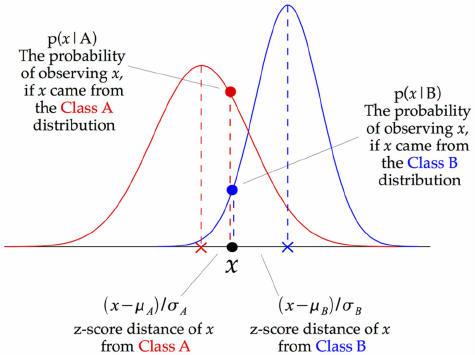

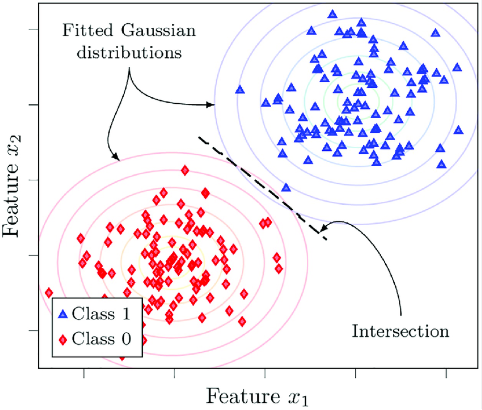

Para multiplas evidências/características se calcula a probabilidade usando a gaussiana individualmente, multiplicando-as com a probabilidade *a priori*.

$P(H|E) = P( E_1 |H )P( E_2 | H) ... P(E_n | H)P(H)$

Por simplificação, o denominador foi ignorado pois funciona como fator de normalização para a probabilidade ficar entre 0 e 1, desnecessário para determinar a classe a que pertence a amostra.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Sample data: [height, weight, gender]
data = np.array([
    [5.9, 160, 'male'],
    [5.5, 130, 'female'],
    [6.0, 155, 'male'],
    [5.8, 140, 'female'],
    [6.2, 165, 'male'],
    [5.6, 120, 'female']
])

# Split data into features and labels
X = data[:, :2].astype(float)  # Features (height, weight)
y = data[:, 2]  # Labels (gender)

# Calculate mean and standard deviation for each feature by gender
means = {}
stds = {}
for gender in np.unique(y):
    indices = np.where(y == gender)
    means[gender] = np.mean(X[indices], axis=0)
    stds[gender] = np.std(X[indices], axis=0)

# Define Gaussian probability function
def gaussian_probability(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Define predict function
def predict_sample(x):
    posteriors = {}
    for gender in means:
        likelihoods = gaussian_probability(x, means[gender], stds[gender])
        prior = len(np.where(y == gender)[0]) / len(y)
        posteriors[gender] = np.prod(likelihoods) * prior
    return max(posteriors, key=posteriors.get)

# Test new samples
new_samples = np.array([
    [5.7, 155],  # Should be male
    [5.4, 125]   # Should be female
])

# Predict labels for new samples
predicted_labels = [predict_sample(sample) for sample in new_samples]

# Print the predicted labels
for sample, label in zip(new_samples, predicted_labels):
    print(f"Sample: {sample} => Predicted Label: {label}")


Sample: [  5.7 155. ] => Predicted Label: male
Sample: [  5.4 125. ] => Predicted Label: female


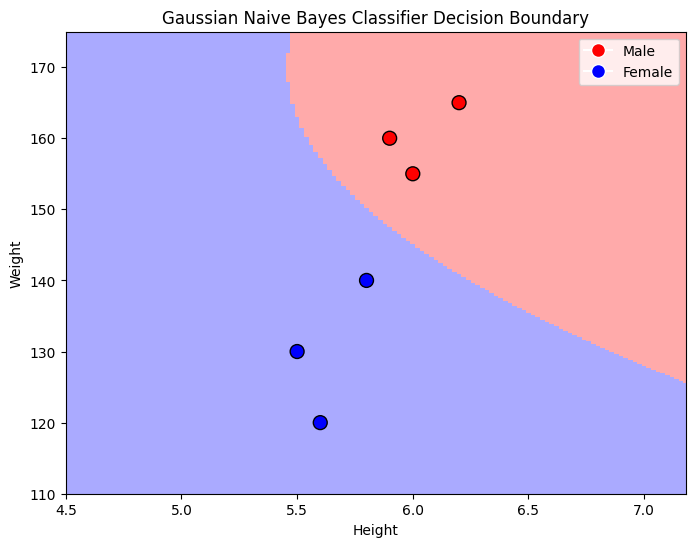

In [ ]:
# Create a meshgrid for visualization
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create color map
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Assign numerical values to class labels
y_encoded = np.array([1 if label == 'female' else 0 for label in y])

# Predict the labels for meshgrid points
Z = np.array([predict_sample([x, y]) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = np.array([1 if label == 'female' else 0 for label in Z])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Gaussian Naive Bayes Classifier Decision Boundary')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF0000', markersize=10, label='Male'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0000FF', markersize=10, label='Female')],
           loc='upper right')
plt.show()

Com a adição de novas amostras, há uma alteração nas médias e desvios padrões das distribuições. Assim "refinando" os limites de decisão.

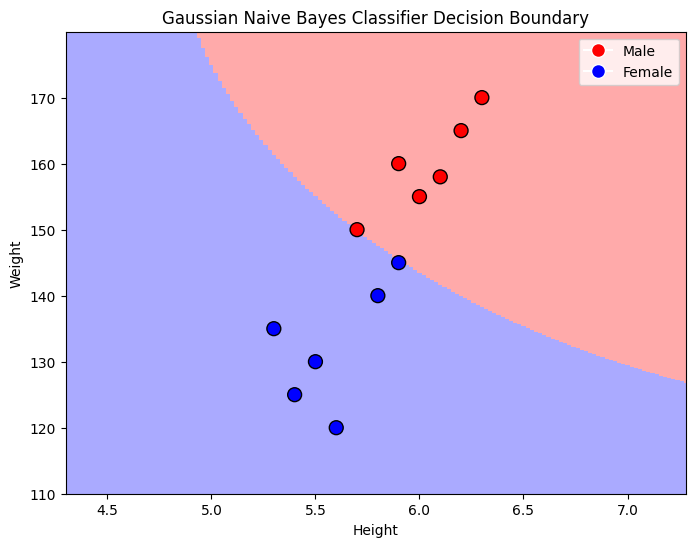

In [ ]:
# Sample data: [height, weight, gender]
data2 = np.array([
    [5.9, 160, 'male'],
    [5.5, 130, 'female'],
    [6.0, 155, 'male'],
    [5.8, 140, 'female'],
    [6.2, 165, 'male'],
    [5.6, 120, 'female'],
    [5.7, 150, 'male'],
    [5.4, 125, 'female'],
    [6.1, 158, 'male'],
    [5.3, 135, 'female'],
    [6.3, 170, 'male'],
    [5.9, 145, 'female']
])

# Split data into features and labels
X = data2[:, :2].astype(float)  # Features (height, weight)
y = data2[:, 2]  # Labels (gender)

# Calculate mean and standard deviation for each feature by gender
means = {}
stds = {}
for gender in np.unique(y):
    indices = np.where(y == gender)
    means[gender] = np.mean(X[indices], axis=0)
    stds[gender] = np.std(X[indices], axis=0)

# Create a meshgrid for visualization
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create color map
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Assign numerical values to class labels
y_encoded = np.array([1 if label == 'female' else 0 for label in y])

# Predict the labels for meshgrid points
Z = np.array([predict_sample([x, y]) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = np.array([1 if label == 'female' else 0 for label in Z])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Gaussian Naive Bayes Classifier Decision Boundary')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF0000', markersize=10, label='Male'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0000FF', markersize=10, label='Female')],
           loc='upper right')
plt.show()


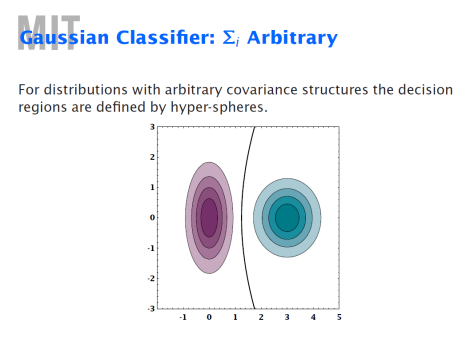